# 1. Problem Statement:

## Business and problems:

BoomBikes is a US based Bike sharing system which make bike for sharing to individuals on short term basis for a price or free. It has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
To overcome the losses BoomBikes is trying to understand the demand of the bikes in certain dock/area so that company can manage bikes availability accordingly. To understand the demand company needs to understand the variables on which sharing bikes demand depends.

## Objective:

I need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# 2. Reading and Understanding data

In [1]:
# Importing necessary and required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read data
bikedf = pd.read_csv('/Users/vinitkumar/Desktop/Course/Upgrad/Module/ML1_Assignment/Final Solution/day.csv')

In [3]:
bikedf.head() #Analyzing few records

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikedf.shape  # checking no of columns and rows

(730, 16)

In [5]:
bikedf.describe() # analyzing statistics of columns like mean, max and others

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikedf.info() # analyzing data types and null scenario

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikedf.isnull().sum() # checking if there is any missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
share_bike_df = bikedf[:] # creating new dataframe which will have modified data

# renaming few short names columns
share_bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humadity'},inplace=True) 
share_bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humadity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
share_bike_df[share_bike_df.duplicated()].count() # checking if our data has any duplicate values

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humadity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Here few columns which do not contribute to our analysis as well as no significance in modeling
# instant - this is index column only so not related to data
# dteday - we already have year and month column which is to be utilised, so this column is insignificant
# casual,registred : we are targeting for total demand of bikes and not for any subcategory with in it 
# and henece our target variable is cnt and not casual & registered
# we can drop these columns : instant,dteday,casual,registered

share_bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
print(bikedf.shape , share_bike_df.shape) # checking shape of both old and new dataframe
share_bike_df.head() # checking few records after column drop

(730, 16) (730, 12)


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humadity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Observations & Insights from reading and understanding data:
- data looks good as it does not have any duplicate and missing values
- Few columns are irrelavent or redudant so we can exclude those columns like instant,dteday,casual & registered

# 3. Visualization

In [11]:
share_bike_df.head()
# listing categorical & continious variable
sbdf_cat_cols = ['season','year','month','holiday','weekday','workingday','weathersit']
sbdf_con_cols = ['temp','atemp','humadity','windspeed','cnt']

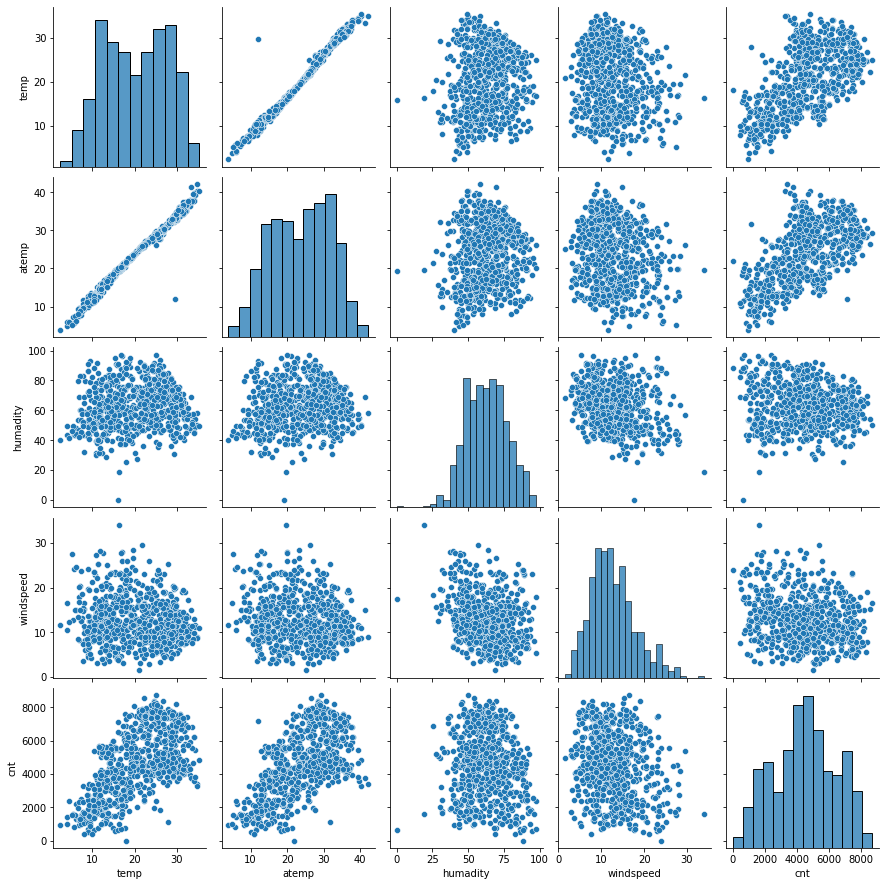

In [12]:
# doing pairplot for continious variables to analyze relation among them
sns.pairplot(data=share_bike_df,vars=sbdf_con_cols)

## Observations:
- temperature(temp) & feeling temperature(atemp) clearly shows linear relationship
- temperature(temp) & feeling temperature(atemp) show some positive trend with target variable cnt

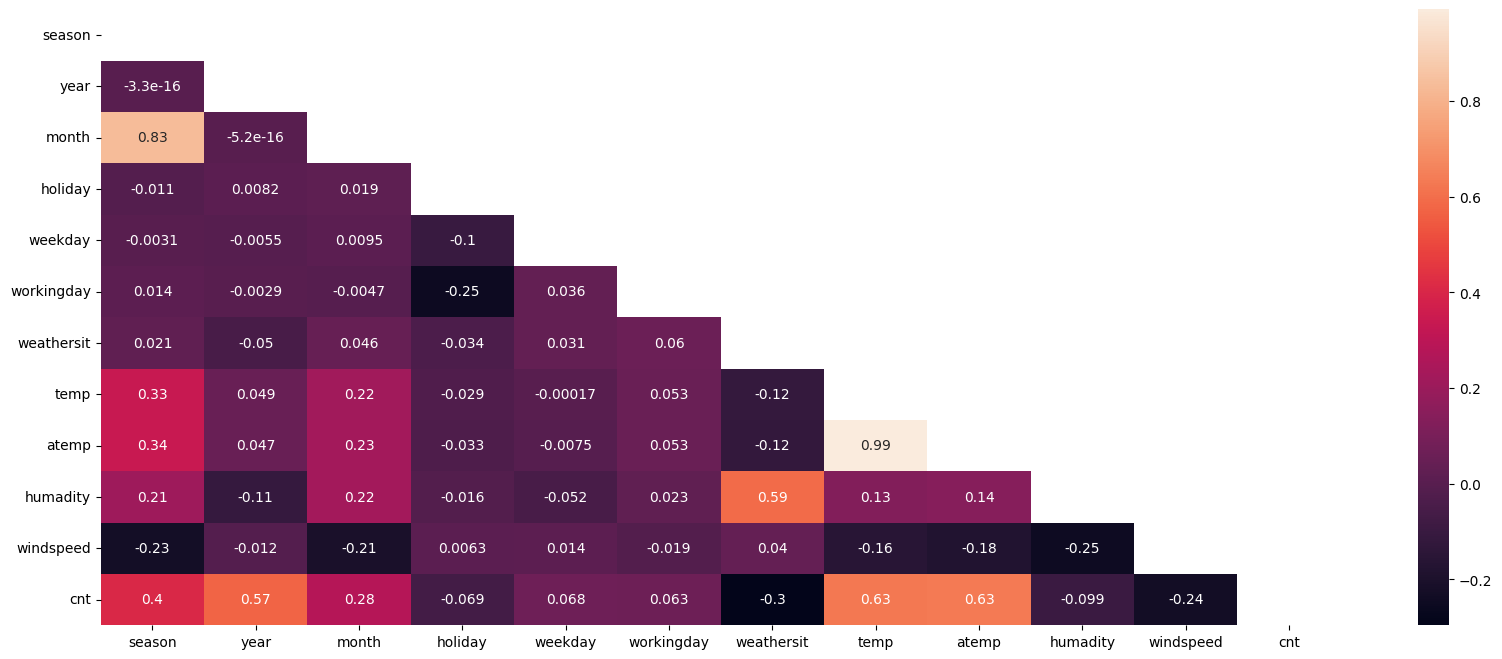

In [13]:
# visualising correlation matrix
plt.figure(figsize=(20,8))
matrix=np.triu(share_bike_df.corr())
sns.heatmap(share_bike_df.corr(),annot=True,mask=matrix)
plt.show()

## Observations:
- except temp VS atemp  and temp,atemp VS cnt there is no strong correlation among variables. Which is good for our modeling.

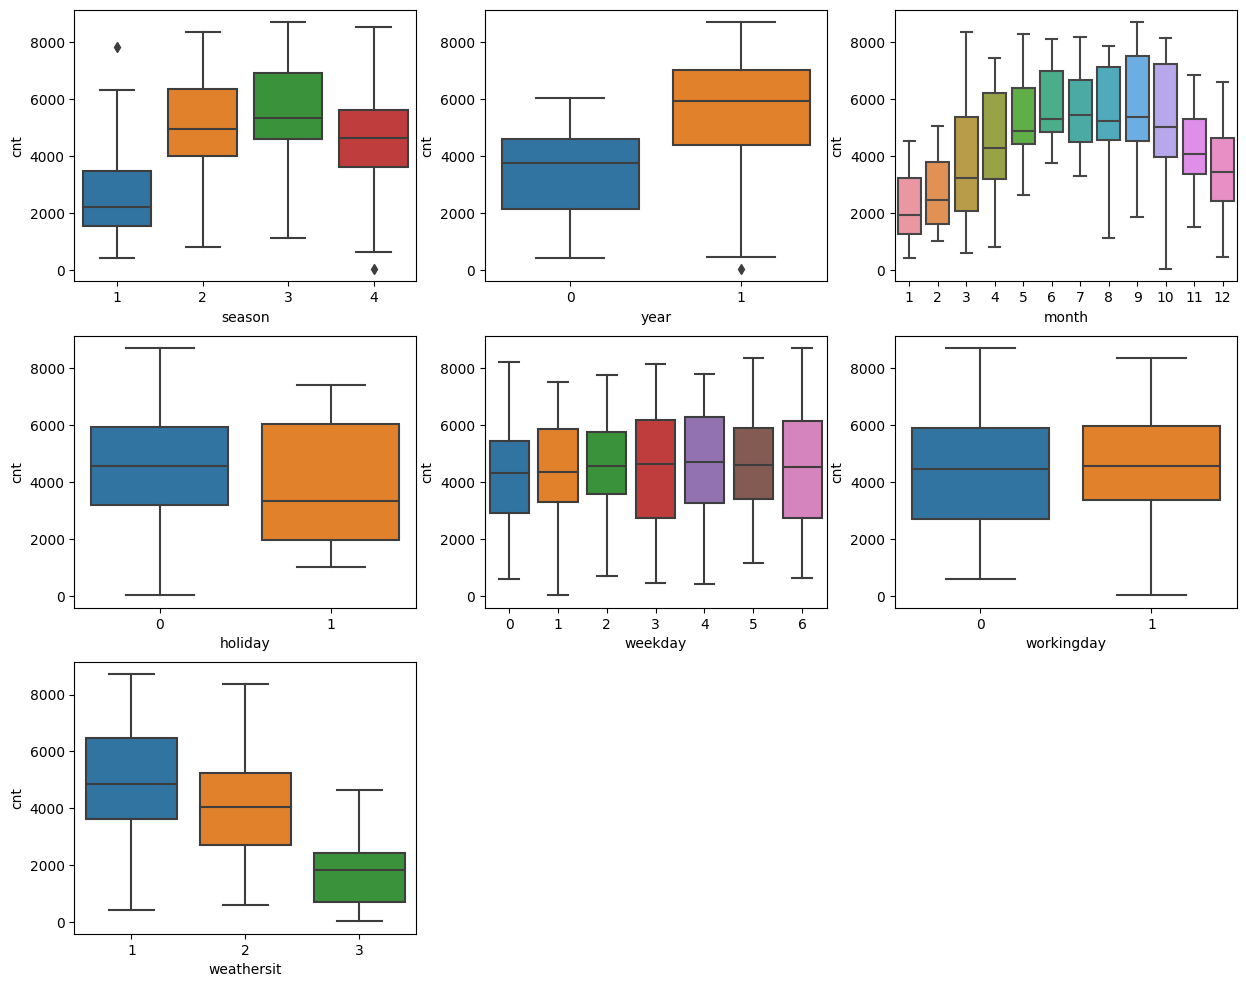

In [14]:
# Let see how categorical variable affect target variable cnt
# ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,12))
plt.subplot(331)
sns.boxplot(x='season',y='cnt',data=share_bike_df)
plt.subplot(332)
sns.boxplot(x='year',y='cnt',data=share_bike_df)
plt.subplot(333)
sns.boxplot(x='month',y='cnt',data=share_bike_df)
plt.subplot(334)
sns.boxplot(x='holiday',y='cnt',data=share_bike_df)
plt.subplot(335)
sns.boxplot(x='weekday',y='cnt',data=share_bike_df)
plt.subplot(336)
sns.boxplot(x='workingday',y='cnt',data=share_bike_df)
plt.subplot(337)
sns.boxplot(x='weathersit',y='cnt',data=share_bike_df)
plt.show()

## Observations:
- Most of the booking is happening in summer(2nd) and Fall(3rd) season with median over 5000 and so it indicates season is good predictor of target variable.
- Month 5 to 10 are having major bookings rather than other months
- Although when there is no holiday booking were done more, however with very less margin than on holiday. It dosen't seem good predictor.
- weekday & workingday dosen't show clear pattern and so it shows insignificant impact on count.
- Clear, Few clouds, Partly cloudy, Partly cloudy(weathersit = 1) shows major bookings and less for other two. So weathersit shows strong predictor of target variable.

# 4. Data Preparation

In [15]:
share_bike_df[sbdf_cat_cols].nunique() # analysing unique values for categorical values

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [16]:
# analysing unique values in each categorical variables
for i in sbdf_cat_cols:
    print(i,share_bike_df[i].unique())

season [1 2 3 4]
year [0 1]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]


### Observations: for columns year,holiday & workingday values are in binary and so we need dummy variable for other categorical variables season,month,weekday & weathersit

In [17]:
share_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humadity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
#converting categorical variables datatype as currently it is in int
share_bike_df.season=share_bike_df.season.astype('category')
share_bike_df.month=share_bike_df.month.astype('category')
share_bike_df.weekday=share_bike_df.weekday.astype('category')
share_bike_df.weathersit=share_bike_df.weathersit.astype('category')

In [19]:
share_bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humadity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
model_bike_df=pd.get_dummies(data=share_bike_df,drop_first=True)

In [21]:
model_bike_df.head()

,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
model_bike_df.shape

(730, 30)

In [23]:
model_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humadity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

# 5. Splitting Data : 70:30 ratio of training and set data

In [24]:
# Using sklearn library for splitting train and test data set
from sklearn.model_selection import train_test_split
 # specify random state so train and test data set remain same everytime
np.random.seed(0)
model_bike_df_train,model_bike_df_test=train_test_split(model_bike_df,train_size=0.7,test_size=0.3,random_state=1000)

In [25]:
model_bike_df_train.shape, model_bike_df_test.shape # check shape of train and test dataset to validate the split

((510, 30), (219, 30))

# 6. Rescaling Features

In [26]:
model_bike_df_train.head()

,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,34.200847,39.33065,48.8750,11.082939,5463,0,1,...,0,0,0,0,0,0,1,0,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,1,0,0,1,0,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0,27.880000,31.88145,51.3333,6.333731,5305,0,1,...,0,0,0,0,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler class

In [28]:
scaler=MinMaxScaler() # instaciating MinMaxScaler object

In [29]:
# list of variables required to be scaled
scal_cols = ['temp','atemp','humadity','windspeed','cnt']

In [30]:
# applying scaling to the train data set
model_bike_df_train[scal_cols]=scaler.fit_transform(model_bike_df_train[scal_cols])

In [31]:
model_bike_df_train.head()

,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,1,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,...,0,0,0,0,0,0,1,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,...,1,0,0,1,0,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,...,0,0,0,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
model_bike_df_train.describe()

,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.684314,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,...,0.076471,0.080392,0.141176,0.135294,0.137255,0.143137,0.152941,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.465245,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,...,0.266010,0.272166,0.348545,0.342373,0.344454,0.350557,0.360284,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


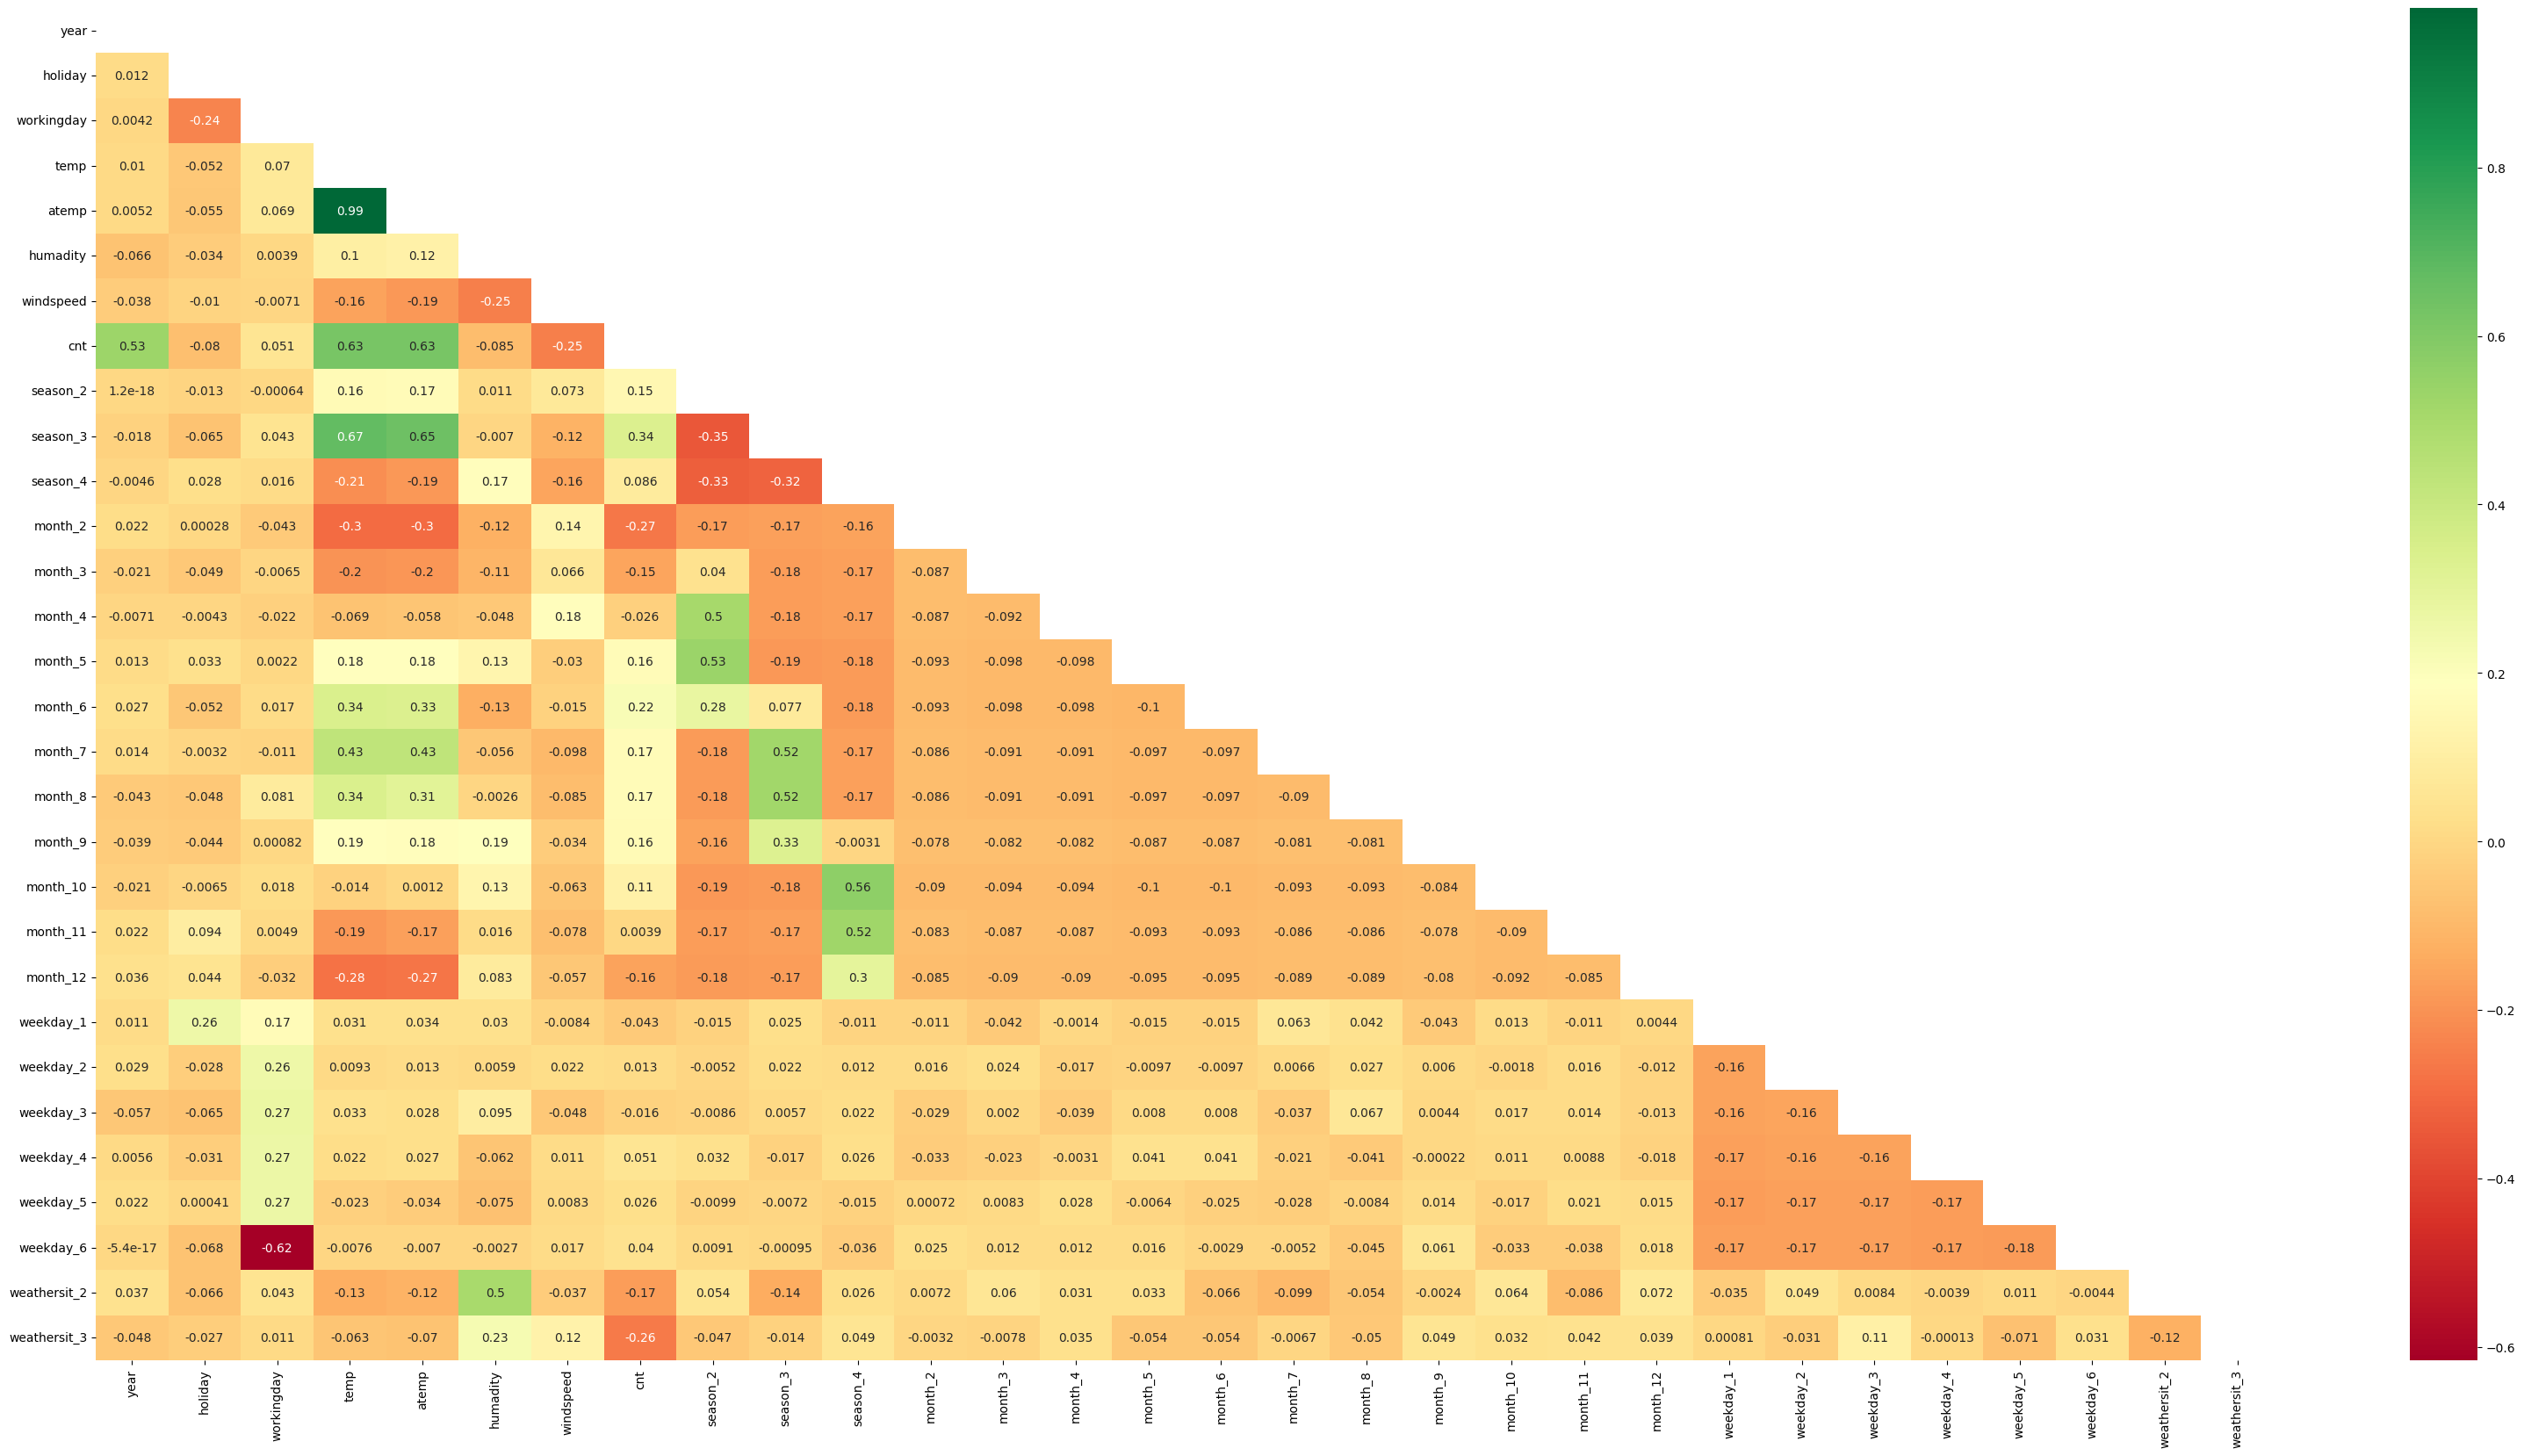

In [33]:
# visualising correlation matrix
plt.figure(figsize=(40,20))
matrix=np.triu(model_bike_df_train.corr())
sns.heatmap(model_bike_df_train.corr(),annot=True,cmap='RdYlGn',mask=matrix)
plt.show()

### Observations: 
- Few medium correlation can be seen for eg. cnt vs year,temp & atemp , season3 vs temp&atemp, However

# 7. Modeling:

In [34]:
# creating X and y set 
y_train = model_bike_df_train.pop('cnt')
X_train = model_bike_df_train

In [35]:
X_train.shape , y_train.shape

((510, 29), (510,))

### Feature selection:

In [36]:
# using RFE for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:

lm = LinearRegression() # instanciating LinearRegression object
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
# targeting no of variable = 15
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [39]:
# extracting rfe ranking data
rfe_df=pd.DataFrame({'Predictor':X_train.columns,'Select Status':rfe.support_,'Ranking':rfe.ranking_})
rfe_df.sort_values(by='Ranking',ascending=False)

,Predictor,Select Status,Ranking
15,month_7,False,15
19,month_11,False,14
10,month_2,False,13
20,month_12,False,12
26,weekday_6,False,11
4,atemp,False,10
14,month_6,False,9
16,month_8,False,8
12,month_4,False,7
11,month_3,False,6


In [40]:
X_train.columns[rfe.support_] # selected columns

Index(['year', 'holiday', 'workingday', 'temp', 'humadity', 'windspeed',
       'season_2', 'season_4', 'month_9', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_] # rejected columns

Index(['atemp', 'season_3', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_10', 'month_11', 'month_12',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [42]:
cols = X_train.columns[rfe.support_]

### model building

In [43]:
X_train_rfe = X_train[cols] # datafreame of selected columns by RFE

In [44]:
X_train_rfe.head()

,year,holiday,workingday,temp,humadity,windspeed,season_2,season_4,month_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_3
544,1,0,1,0.964059,0.503649,0.294854,0,0,0,0,0,0,0,1,0
674,1,0,1,0.240884,0.584370,0.311545,0,1,0,0,1,0,0,0,0
477,1,0,1,0.294252,0.790039,0.579511,1,0,0,1,0,0,0,0,0
176,0,0,0,0.762572,0.528982,0.148724,0,0,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.750536,0.442296,0,1,0,0,0,0,1,0,0


In [45]:
import statsmodels.api as sm  # importing statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor # importing VIF from statsmode

In [46]:
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.37e-174
Time:                        00:51:25   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -945.3
Df Residuals:                     495   BIC:                            -881.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2942      0.028     10.414      0.000       0.239       0.350
year             0.2226      0.008     26.458      0.000       0.206       0.239
holiday         -0.0727      0.024     -3.047      0.002      -0.120      -0.026
workingday       0.0061      0.008      0.757      0.449      -0.010       0.022
temp             0.5702      0.019     30.145      0.000       0.533       0.607
humadity        -0.2847      0.032     -8.831      0.000      -0.348      -0.221
windspeed       -0.1674      0.028     -5.979      0.000      -0.222      -0.112
season_2         0.0858      0.010      8.268      0.000       0.065       0.106
season_4         0.1563      0.011     14.178      0.000       0.135       0.178
month_9          0.1118      0.018      6.369      0.000       0.077       0.146
weekday_1       -0.0312      0.010     -3.006      0.003      -0.052      -0.011
weekday_2       -0.0186      0.011     -1.640      0.102      -0.041       0.004
weekday_3       -0.0049      0.011     -0.423      0.672      -0.027       0.018
weekday_4       -0.0059      0.011     -0.534      0.594      -0.028       0.016
weekday_5       -0.0059      0.011     -0.552      0.581      -0.027       0.015
weathersit_3    -0.2085      0.027     -7.716      0.000      -0.262      -0.155
==============================================================================
Omnibus:                       60.542   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.296
Skew:                          -0.725   Prob(JB):                     3.05e-24
Kurtosis:                       4.731   Cond. No.                     1.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
# VIF computation
def fetch_vif(df):
    vifdf=pd.DataFrame()
    vifdf['features']=df.columns
    vifdf['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vifdf['VIF']=round(vifdf.VIF,2)
    vifdf = vifdf.sort_values(by='VIF',ascending=False)
    vifdf = vifdf.reset_index(drop=True)
    return vifdf

In [48]:
fetch_vif(X_train_rfe)

,features,VIF
0,holiday,inf
1,workingday,inf
2,weekday_1,inf
3,weekday_2,inf
4,weekday_3,inf
5,weekday_4,inf
6,weekday_5,inf
7,humadity,10.47
8,temp,5.97
9,windspeed,4.26


### Here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it and then rebuild the model

In [49]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['weekday_3'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.37e-174
Time:                        00:51:25   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -945.3
Df Residuals:                     495   BIC:                            -881.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2942      0.028     10.414      0.000       0.239       0.350
year             0.2226      0.008     26.458      0.000       0.206       0.239
holiday         -0.0775      0.031     -2.519      0.012      -0.138      -0.017
workingday       0.0013      0.014      0.091      0.928      -0.026       0.028
temp             0.5702      0.019     30.145      0.000       0.533       0.607
humadity        -0.2847      0.032     -8.831      0.000      -0.348      -0.221
windspeed       -0.1674      0.028     -5.979      0.000      -0.222      -0.112
season_2         0.0858      0.010      8.268      0.000       0.065       0.106
season_4         0.1563      0.011     14.178      0.000       0.135       0.178
month_9          0.1118      0.018      6.369      0.000       0.077       0.146
weekday_1       -0.0264      0.016     -1.620      0.106      -0.058       0.006
weekday_2       -0.0137      0.016     -0.849      0.396      -0.045       0.018
weekday_4       -0.0011      0.016     -0.068      0.946      -0.032       0.030
weekday_5       -0.0011      0.016     -0.069      0.945      -0.032       0.030
weathersit_3    -0.2085      0.027     -7.716      0.000      -0.262      -0.155
==============================================================================
Omnibus:                       60.542   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.296
Skew:                          -0.725   Prob(JB):                     3.05e-24
Kurtosis:                       4.731   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,humadity,10.47
1,workingday,7.35
2,temp,5.97
3,windspeed,4.26
4,weekday_5,2.17
5,weekday_1,2.14
6,weekday_4,2.08
7,weekday_2,2.02
8,year,1.94
9,season_2,1.64


### Here P-value of weekday_4 is vey high 0.946 way higher than 0.05 so dropping it and then rebuild the model

In [51]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['weekday_4'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.02e-175
Time:                        00:51:25   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     496   BIC:                            -888.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2941      0.028     10.430      0.000       0.239       0.349
year             0.2226      0.008     26.498      0.000       0.206       0.239
holiday         -0.0781      0.029     -2.649      0.008      -0.136      -0.020
workingday       0.0007      0.011      0.063      0.950      -0.021       0.023
temp             0.5702      0.019     30.175      0.000       0.533       0.607
humadity        -0.2845      0.032     -8.866      0.000      -0.348      -0.221
windspeed       -0.1675      0.028     -5.988      0.000      -0.222      -0.113
season_2         0.0858      0.010      8.279      0.000       0.065       0.106
season_4         0.1563      0.011     14.198      0.000       0.135       0.178
month_9          0.1118      0.018      6.375      0.000       0.077       0.146
weekday_1       -0.0258      0.014     -1.836      0.067      -0.053       0.002
weekday_2       -0.0131      0.014     -0.947      0.344      -0.040       0.014
weekday_5       -0.0005      0.013     -0.039      0.969      -0.027       0.026
weathersit_3    -0.2084      0.027     -7.730      0.000      -0.261      -0.155
==============================================================================
Omnibus:                       60.580   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.436
Skew:                          -0.725   Prob(JB):                     2.84e-24
Kurtosis:                       4.732   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,humadity,10.40
1,temp,5.97
2,workingday,4.68
3,windspeed,4.24
4,year,1.94
5,season_2,1.64
6,season_4,1.61
7,weekday_1,1.60
8,weekday_5,1.57
9,weekday_2,1.49


### Here P-value of weekday_5 is vey high 0.946 way higher than 0.05 so dropping it and then rebuild the model

In [53]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['weekday_5'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.26e-177
Time:                        00:51:25   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -949.3
Df Residuals:                     497   BIC:                            -894.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2941      0.028     10.446      0.000       0.239       0.349
year             0.2225      0.008     26.537      0.000       0.206       0.239
holiday         -0.0784      0.029     -2.709      0.007      -0.135      -0.022
workingday       0.0005      0.010      0.051      0.959      -0.019       0.020
temp             0.5702      0.019     30.236      0.000       0.533       0.607
humadity        -0.2845      0.032     -8.878      0.000      -0.347      -0.222
windspeed       -0.1675      0.028     -5.995      0.000      -0.222      -0.113
season_2         0.0858      0.010      8.290      0.000       0.065       0.106
season_4         0.1563      0.011     14.221      0.000       0.135       0.178
month_9          0.1118      0.018      6.383      0.000       0.077       0.146
weekday_1       -0.0256      0.013     -1.942      0.053      -0.052       0.000
weekday_2       -0.0130      0.013     -0.995      0.320      -0.039       0.013
weathersit_3    -0.2084      0.027     -7.763      0.000      -0.261      -0.156
==============================================================================
Omnibus:                       60.606   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.512
Skew:                          -0.725   Prob(JB):                     2.73e-24
Kurtosis:                       4.733   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,humadity,10.40
1,temp,5.96
2,windspeed,4.23
3,workingday,3.77
4,year,1.93
5,season_2,1.64
6,season_4,1.61
7,weekday_1,1.41
8,weekday_2,1.32
9,holiday,1.21


### Here P-value of workingday is vey high 0.959 way higher than 0.05 so dropping it and then rebuild the model

In [55]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['workingday'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.92e-178
Time:                        00:51:25   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     498   BIC:                            -900.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2944      0.027     10.735      0.000       0.240       0.348
year             0.2225      0.008     26.563      0.000       0.206       0.239
holiday         -0.0788      0.027     -2.870      0.004      -0.133      -0.025
temp             0.5703      0.019     30.316      0.000       0.533       0.607
humadity        -0.2845      0.032     -8.895      0.000      -0.347      -0.222
windspeed       -0.1675      0.028     -6.003      0.000      -0.222      -0.113
season_2         0.0858      0.010      8.299      0.000       0.065       0.106
season_4         0.1563      0.011     14.250      0.000       0.135       0.178
month_9          0.1118      0.017      6.389      0.000       0.077       0.146
weekday_1       -0.0254      0.013     -2.019      0.044      -0.050      -0.001
weekday_2       -0.0128      0.012     -1.031      0.303      -0.037       0.012
weathersit_3    -0.2083      0.027     -7.772      0.000      -0.261      -0.156
==============================================================================
Omnibus:                       60.667   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.557
Skew:                          -0.726   Prob(JB):                     2.67e-24
Kurtosis:                       4.732   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,humadity,9.90
1,temp,5.84
2,windspeed,4.13
3,year,1.93
4,season_2,1.64
5,season_4,1.60
6,weekday_1,1.29
7,weekday_2,1.19
8,month_9,1.18
9,holiday,1.10


### Here P-value of weekday_2 is vey high 0.303 way higher than 0.05 so dropping it and then rebuild the model

In [57]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['weekday_2'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.39e-179
Time:                        00:51:25   Log-Likelihood:                 487.08
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     499   BIC:                            -905.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2936      0.027     10.711      0.000       0.240       0.347
year             0.2223      0.008     26.542      0.000       0.206       0.239
holiday         -0.0792      0.027     -2.886      0.004      -0.133      -0.025
temp             0.5699      0.019     30.300      0.000       0.533       0.607
humadity        -0.2854      0.032     -8.926      0.000      -0.348      -0.223
windspeed       -0.1686      0.028     -6.046      0.000      -0.223      -0.114
season_2         0.0859      0.010      8.312      0.000       0.066       0.106
season_4         0.1562      0.011     14.237      0.000       0.135       0.178
month_9          0.1119      0.017      6.396      0.000       0.078       0.146
weekday_1       -0.0233      0.012     -1.878      0.061      -0.048       0.001
weathersit_3    -0.2072      0.027     -7.737      0.000      -0.260      -0.155
==============================================================================
Omnibus:                       59.924   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.338
Skew:                          -0.715   Prob(JB):                     2.98e-24
Kurtosis:                       4.748   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,humadity,9.84
1,temp,5.83
2,windspeed,4.11
3,year,1.93
4,season_2,1.64
5,season_4,1.60
6,weekday_1,1.26
7,month_9,1.18
8,holiday,1.10
9,weathersit_3,1.09


In [59]:
### Here VIF of humadity is on higher side 9.84, higher than 5 so dropping it and then rebuild the model

In [60]:
# here P-value of weekday_3 is vey high 0.67 way higher than 0.05 so dropping it
cols=cols.drop(['humadity'])
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe) # adding constant
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.51e-164
Time:                        00:51:25   Log-Likelihood:                 449.31
No. Observations:                 510   AIC:                            -878.6
Df Residuals:                     500   BIC:                            -836.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1003      0.018      5.548      0.000       0.065       0.136
year             0.2270      0.009     25.244      0.000       0.209       0.245
holiday         -0.0704      0.030     -2.383      0.018      -0.128      -0.012
temp             0.5594      0.020     27.701      0.000       0.520       0.599
windspeed       -0.1054      0.029     -3.633      0.000      -0.162      -0.048
season_2         0.0747      0.011      6.770      0.000       0.053       0.096
season_4         0.1387      0.012     11.943      0.000       0.116       0.162
month_9          0.0834      0.019      4.509      0.000       0.047       0.120
weekday_1       -0.0289      0.013     -2.161      0.031      -0.055      -0.003
weathersit_3    -0.2693      0.028     -9.675      0.000      -0.324      -0.215
==============================================================================
Omnibus:                       59.262   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.073
Skew:                          -0.746   Prob(JB):                     8.33e-22
Kurtosis:                       4.531   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
fetch_vif(X_train_rfe) # validating VIF

,features,VIF
0,temp,3.62
1,windspeed,3.20
2,year,1.87
3,season_2,1.59
4,season_4,1.30
5,weekday_1,1.25
6,month_9,1.17
7,holiday,1.10
8,weathersit_3,1.06


### Now this model looks significant with all P-value under control as well as VIF of the features under this model
- R-square & Adjusted R-square looks good at 0.792 and 0.788
- F-static also looks good and tells good fit of the model

## Residual Analysis : 
   - Error term should be normally distributed with mean 0

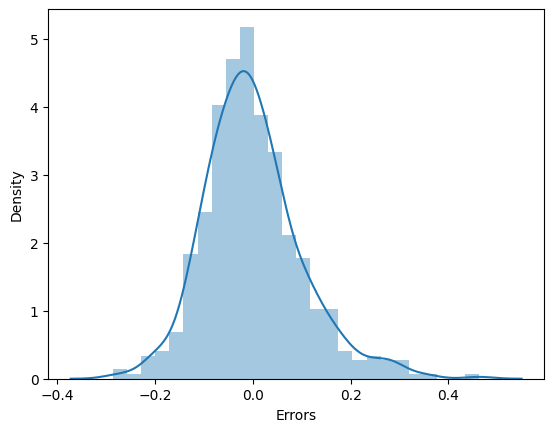

In [62]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Errors')
plt.show()

### we can clearly see error terms are normally distributed around mean 0

<AxesSubplot:>

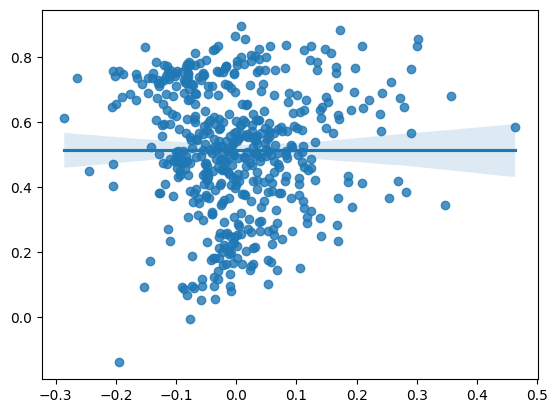

In [63]:
sns.regplot(residual,y_train_pred)

- validating pattern , no pattern found on error terms

## Prediction on test data

In [64]:
print(model_bike_df_test.shape)
model_bike_df_test.head()

(219, 30)


,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,...,1,0,1,0,0,0,0,0,0,0
320,0,0,1,14.008347,16.16105,57.5833,20.459254,3053,0,0,...,1,0,0,0,0,1,0,0,1,0
189,0,0,0,30.066653,33.20790,60.9167,11.250104,5336,0,1,...,0,0,0,0,0,0,0,1,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,...,0,0,0,0,1,0,0,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# applying scaling to the train data set
model_bike_df_test[scal_cols]=scaler.fit_transform(model_bike_df_test[scal_cols])

In [66]:
model_bike_df_test.head()

,year,holiday,workingday,temp,atemp,humadity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.425132,0.443731,0.702436,0.029828,0.440595,0,0,...,1,0,1,0,0,0,0,0,0,0
320,0,0,1,0.357625,0.336660,0.447795,0.656192,0.313639,0,0,...,1,0,0,0,0,1,0,0,1,0
189,0,0,0,0.853381,0.806777,0.494200,0.309232,0.608791,0,1,...,0,0,0,0,0,0,0,1,0,0
382,1,0,1,0.309103,0.270518,0.263340,0.934031,0.355398,0,0,...,0,0,0,0,1,0,0,0,0,0
388,1,0,1,0.358679,0.372355,0.809744,0.197798,0.479897,0,0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
y_test = model_bike_df_test.pop('cnt')
X_test = model_bike_df_test

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   humadity      219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  month_2       219 non-null    uint8  
 11  month_3       219 non-null    uint8  
 12  month_4       219 non-null    uint8  
 13  month_5       219 non-null    uint8  
 14  month_6       219 non-null    uint8  
 15  month_7       219 non-null    uint8  
 16  month_8       219 non-null    uint8  
 17  month_9       219 non-null    uint8  
 18  month_10      219 non-null  

In [69]:
# creating X_test with those columns which was selected in final model
X_test_final_model =X_test[X_train_rfe.columns]
X_test_final_model = sm.add_constant(X_test_final_model) # adding constant to test data
X_test_final_model.head()

,const,year,holiday,temp,windspeed,season_2,season_4,month_9,weekday_1,weathersit_3
310,1.0,0,0,0.425132,0.029828,0,1,0,1,0
320,1.0,0,0,0.357625,0.656192,0,1,0,0,0
189,1.0,0,0,0.853381,0.309232,0,0,0,0,0
382,1.0,1,0,0.309103,0.934031,0,0,0,0,0
388,1.0,1,0,0.358679,0.197798,0,0,0,0,0


In [70]:
# prediction
y_test_pred = lr_model.predict(X_test_final_model)

In [71]:
y_test

310    0.440595
320    0.313639
189    0.608791
382    0.355398
388    0.479897
         ...   
436    0.674855
657    0.964835
606    0.916096
417    0.536005
460    0.754105
Name: cnt, Length: 219, dtype: float64

In [72]:
y_test_pred

310    0.444826
320    0.369882
189    0.545098
382    0.401728
388    0.507083
         ...   
436    0.634506
657    0.747740
606    0.777352
417    0.515384
460    0.577898
Length: 219, dtype: float64

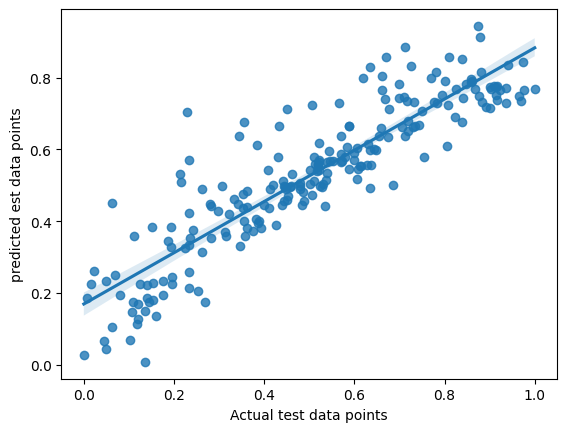

In [73]:
sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel('Actual test data points')
plt.ylabel('predicted est data points')
plt.show()

- Above plot shows linear relation between actual test data and predicted data points

In [74]:
# R-square value test
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
r2

0.7827316047687418

In [75]:
# Adjusted R-square value test
n = X_test_final_model.shape[0] # no of rows
p = X_test_final_model.shape[1] # no of predictors
# r2 = 0.7827316047687418  calculated above
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7722860088441621

## Above model prediction and evaluation looks good and hence we can say that below are the predictor variables of the bike demands:
- year
- holiday
- temp
- windspeed
- season_2 : summer
- season_4 : winter
- month_9
- weekday_1
- weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds